<a href="https://colab.research.google.com/github/cagricivici/digit_rec/blob/main/mnist_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [3]:
!mkdir drive
!google-drive-ocamlfuse drive

mkdir: cannot create directory ‘drive’: File exists


In [4]:
import os 
os.chdir("/content/drive/Colab_Notebooks/23december")
!pwd

/content/drive/Colab_Notebooks/23december


In [86]:
#import modules
#https://keras.io/api/datasets/mnist/
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.optimizers import SGD

import matplotlib.pyplot as plt


In [87]:
#https://keras.io/examples/vision/mnist_convnet/
# the data, split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()



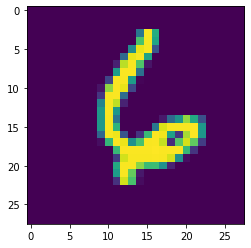

In [88]:
x_train[5000]

plt.imshow(x_train[59000])

In [89]:
#mnist split dataset to 2 parts: train(size=60000), test(size=10000)
#A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000... 
#images are used to test it.
print(len(x_train),len(y_train),len(x_test),len(y_test))


60000 60000 10000 10000


In [90]:
#Each image is a 28 by 28 pixel square (784 pixels total).

print("one image:", x_train[5].shape,"pixel square")
print("all images:",x_train.shape,"pixel square")

one image: (28, 28) pixel square
all images: (60000, 28, 28) pixel square


In [91]:
#we need feature vector (number of element: 784)
#reshape!!

_x_train_ = x_train.reshape(60000,784)
print("feature vector (784,1)")
print(_x_train_.shape)
_x_train_[5].shape

feature vector (784,1)
(60000, 784)


(784,)

In [92]:
_x_train_.shape[1]

784

In [93]:
_x_test_ = x_test.reshape(10000,784) 

plt.subplot(241), plt.imshow(x_train[0], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(242), plt.imshow(x_train[1], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(x_train[2], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(244), plt.imshow(x_train[3], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(245), plt.imshow(x_train[4], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(x_train[5], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(247), plt.imshow(x_train[6], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
plt.subplot(248), plt.imshow(x_train[7], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])

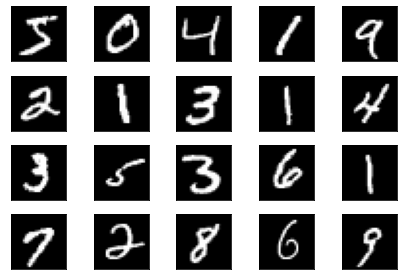

In [110]:
for k in range(20):
  _k_ = k+1
  plt.subplot(4,5,_k_),plt.imshow(x_train[k], cmap=plt.get_cmap('gray')), plt.xticks([]), plt.yticks([])
# show the plot
plt.tight_layout()

plt.savefig("/content/drive/Colab_Notebooks/23december/mnist.png")
plt.show()

In [97]:
#creating model
model = Sequential()
model.add(Dense(input_dim=_x_train_.shape[1],
                units = 50,
                kernel_initializer = 'uniform',
                activation = 'tanh'))

In [99]:
from keras.layers.core import Activation
from keras.layers.core import Dropout

model.add(Dense(50, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(50, kernel_initializer='uniform'))
model.add(Activation('relu'))

In [100]:
from keras.utils.np_utils import to_categorical
y_train_ohe = to_categorical(y_train)


In [102]:
model.add(Dense(10, kernel_initializer='uniform'))
model.add(Activation('softmax'))

In [103]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [104]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd)

In [107]:
model.fit(_x_train_,
          y_train_ohe,
          nb_epoch = 50,
          batch_size = 500,
          validation_split = 0.1,
          verbose = 1)

TypeError: ignored